In [1]:
# 조금 변형해본 코드
from konlpy.tag import Okt
from gensim.models.fasttext import FastText, load_facebook_vectors, load_facebook_model
import os
import pandas as pd
import re
from gensim.test.utils import datapath

# 전처리 코드
def preprocess_korean_text(text, stop_words=[], pos_tags=['Noun']):
    okt = Okt()
    
    # 형태소 분석을 통한 토큰화 및 품사 태깅
    morphs = okt.pos(text, norm=True, stem=True)
    
    # 선택한 품사의 단어만 추출
    words = [word for word, pos in morphs if pos in pos_tags]
    
    # 불용어 제거
    words = [word for word in words if word not in stop_words]
    
    return words

def process_csv_file(csv_path, stop_words=[]):
    new_data = []
    
    df = pd.read_csv(csv_path, encoding='utf-8')
    if 'reviews' in df.columns:
        for text in df['reviews']:
            # 추가적인 전처리 작업 (예: 특수 문자 제거, 숫자 제거 등)
            text = re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z\s]', '', text)
            
            # 전처리된 문장을 추가 데이터에 포함
            tokens = preprocess_korean_text(text, stop_words)
            new_data.append(tokens)
    
    return new_data


# 기존 pre-trained 모델 경로
pretrained_model_path = 'wiki.ko.bin'

# 새로운 데이터 파일 경로
csv_file_path = '../ReviewData/reviews_only.csv'

# 불용어 리스트 (필요에 따라 추가)
stop_words = ['의','가', '에','들','는','잘','걍','과','도','를','으로','한','하다','!','?','<','>','(',')','[',']','|','#','.', '이','은','는','을','에','에서','로']

# 사전 학습 모델 로드
# model = load_facebook_vectors(pretrained_model_path)
model = load_facebook_model(pretrained_model_path)

# CSV 파일 처리 및 전처리
new_data = process_csv_file(csv_file_path, stop_words)
print(new_data)

# 모델 업데이트
model.build_vocab(corpus_iterable=new_data, update=True)
model.train(corpus_iterable=new_data, total_examples=len(new_data), epochs=model.epochs)

# 업데이트된 모델 저장
updated_model_path = 'updated_model.bin'
model.save(updated_model_path)

# 저장된 모델 경로 출력
print(f"모델이 성공적으로 업데이트되었습니다. 업데이트된 모델 경로: {os.path.abspath(updated_model_path)}")

[['만', '완두콩', '옥수수', '짜장면', '배달', '무척', '짬뽕', '국물', '서비스', '오니', '야식', '때', '정말', '입맛', '조금'], ['배달', '초', '스피드', '개맛'], ['잡채', '밥'], ['맛', '양', '최고'], [], [], ['제', '도착', '문자', '체크', '놧', '시간', '레', '문자', '혹시', '해', '서문', '보', '음식', '음식', '식', '상태', '문자', '뭐', '참나'], [], ['탕수육', '짬뽕', '짜장', '제', '입맛', '좀', '요담', '요청'], ['인분', '배달', '곳', '제일', '여기', '만', '구'], ['아침', '일찍', '인분', '배달'], ['여기', '볶음밥', '직접', '듯'], ['배달', '가격', '맛', '굿'], ['내용물', '짐'], ['이름', '값', '집', '그냥', '요리', '게다가', '새벽'], ['오늘', '탕', '최악', '탕수육', '역', '냄새', '질겨', '가끔', '땅짬', '땅', '면', '배달', '그동안', '냄새', '좀', '오늘', '탕수육', '점'], [], ['굿'], [], [], ['맛'], ['기스면', '국물', '아쭈'], ['어어', '무'], ['배달'], ['맛', '환상', '최고'], ['저', '짜장면', '때', '항상', '여기', '주문', '진짜'], [], ['배달', '개', '존맛'], ['여기', '짜장', '완전', '제', '스타일'], ['배달', '완전', '강추'], [], [], ['십분'], ['양도', '돈까스', '음', '또'], [], ['사진'], ['방장', '자장면', '면발', '읍니', '때', '요리왕', '면', '최고', '짬뽕', '국물', '맛', '일품', '요', '요리왕', '다시', '자주'], ['양'], ['년', '전', '피시방', '자주', '직장인', '감회'

In [2]:
import pandas as pd
from gensim.models.fasttext import FastText

model = FastText.load('./updated_model.bin')
model.wv.most_similar("커피")

[('커피콩', 0.8837543725967407),
 ('원두커피', 0.8780828714370728),
 ('커피도', 0.8715633749961853),
 ('커피집', 0.8689804077148438),
 ('커피향', 0.8688018321990967),
 ('커피잔', 0.8659747838973999),
 ('주커피', 0.8606260418891907),
 ('커피점', 0.8583560585975647),
 ('커피로', 0.8578361868858337),
 ('커피의', 0.8521653413772583)]

In [1]:
import pandas as pd
from textblob import TextBlob

# CSV 파일 불러오기
df = pd.read_csv('../ReviewData/reviews_converted.csv') 

# 감정 라벨링 함수 정의
def label_sentiment(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return '긍정'
    elif polarity == 0:
        return '중립'
    else:
        return '부정'

# 각 리뷰에 대해 감정 라벨링 수행
df['sentiment'] = df['reviews'].apply(label_sentiment)

# 결과 저장
df.to_csv('labeled_reviews.csv', index=False)


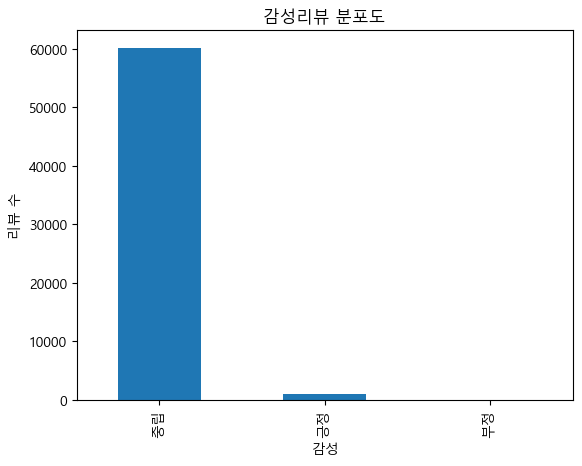

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('labeled_reviews.csv')  # 'your_file.csv'를 실제 파일 경로로 바꾸세요

# 감정 라벨에 따른 카운트 계산
sentiment_counts = df['sentiment'].value_counts()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# 막대 그래프 생성
sentiment_counts.plot(kind='bar')
plt.title('감성리뷰 분포도')
plt.xlabel('감성')
plt.ylabel('리뷰 수')
plt.show()


In [7]:
from konlpy.tag import Okt
from gensim.models.fasttext import FastText, load_facebook_vectors, load_facebook_model
import os
import pandas as pd
import re
from gensim.test.utils import datapath
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = FastText.load('./updated_model.bin')

model.wv.most_similar("치킨")




[('양념치킨', 0.8871572017669678),
 ('치킨이', 0.8856399059295654),
 ('치킨윙', 0.8747058510780334),
 ('치킨과', 0.869350254535675),
 ('치킨의', 0.8556543588638306),
 ('치킨에', 0.855244517326355),
 ('치킨집', 0.8461618423461914),
 ('치킨너겟', 0.8459231853485107),
 ('치킨은', 0.8397529125213623),
 ('후라이드', 0.8269931674003601)]

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def get_feature_vector(restaurant, model):
    # FastText 임베딩 벡터 추출
    embedding = model.wv[restaurant['name']]
    
    # 추가 데이터 특성 (예: cleanMark, delivery_cost, least_cost)
    additional_features = [restaurant['cleanMark'], restaurant['delivery_cost'], restaurant['least_cost']]
    
    # FastText 임베딩과 추가 특성 결합
    feature_vector = np.concatenate([embedding, additional_features])
    return feature_vector

def recommend_restaurants(user_profile, restaurants_df, model, top_n=5):
    # 각 가게에 대한 특성 벡터 생성
    restaurant_feature_vectors = restaurants_df.apply(lambda x: get_feature_vector(x, model), axis=1)

    # 사용자 프로필과 각 가게의 유사성 계산
    similarities = [cosine_similarity([user_profile], [fv.reshape(1, -1)]) for fv in restaurant_feature_vectors]

    # 가장 유사도가 높은 상위 N개의 가게 추천
    recommended_indices = np.argsort(similarities, axis=0)[-top_n:].flatten()
    recommended_restaurants = restaurants_df.iloc[recommended_indices]

    return recommended_restaurants

print(model.wv["치킨"])
print(model.wv.most_similar("치킨"))
print(f'유사도 계산: {model.wv.similarity("치킨", "양념치킨")}')
print(f'모델 벡터 사이즈 {model.vector_size}')

pri


[-0.7222481   0.20597163 -1.081408   -0.2570518  -0.6102851   0.00333382
  0.07350639 -0.31816053  0.43958127 -0.5315268  -0.04514848  0.37618294
 -0.51301783  0.3696297  -0.5705189   1.0053974   0.12848054  0.66168666
 -0.04247546 -0.59277546  0.11935624 -0.5903528   0.44386256 -0.8643426
  0.17530805 -0.5970933   0.05644643  0.40954626 -0.47835052  1.2139225
  0.02307688 -0.11608458  0.00396005 -0.40229043 -0.00291247 -0.23590213
 -0.3684864   0.46876124  0.10251188  0.19672918 -0.38076103 -0.3454304
 -0.8663302  -0.2828557   0.5558193  -0.74087524 -0.6376807  -0.05881668
  0.7396134  -0.13216144 -0.07724783  0.87792355 -0.5579085  -0.22536887
 -0.00552856 -0.59840405 -0.22631294  0.4971205  -0.25380874 -0.4244602
  0.7395544   0.6927224   0.06749749 -0.29099444 -0.09110897 -0.33217892
 -0.13133557 -0.26083332  0.386703   -0.340642    0.21493576 -0.500407
 -0.09725062 -0.18457197 -0.35885656 -0.3433004   0.12537965  0.36950853
  0.53269446  0.27816147  0.30307388 -0.05405637  1.20067

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.fasttext import FastText
import numpy as np

# 예시: FastText 임베딩과 다른 특성을 결합한 추천 시스템
def recommend_restaurants(user_profile, restaurants, top_n=5):
    # 각 가게의 특성 벡터 생성 (FastText 임베딩 + 추가 특성)
    # 예: feature_vector = np.concatenate([embedding, [cleanMark, delivery_cost, least_cost]])

    # 사용자 프로필과 각 가게의 유사성 계산
    similarities = [cosine_similarity(user_profile, restaurant_feature_vector) for restaurant_feature_vector in restaurants]

    # 가장 유사도가 높은 상위 N개의 가게 추천
    recommended_restaurants = np.argsort(similarities)[-top_n:]

    return recommended_restaurants
